In [1]:
# PEP8
# https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/master/lessons/04/style.ipynb
# Colab setup ------------------
import os, sys, subprocess
if "google.colab" in sys.modules:
    cmd = "pip install --upgrade watermark blackcellmagic"
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)


# Setup

In [2]:
import glob 
from datetime import datetime
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.offline as py_offline
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns

# Import the networkx package:
import networkx as nx
print(nx.__version__)

2.6.3


# Load data


## Download data

In [3]:
# https://drive.google.com/file/d/16wvFID9QT8VCYSiWWyKhT4-rU_Z9lCI3/view?usp=sharing
!gdown https://drive.google.com/uc?id=16wvFID9QT8VCYSiWWyKhT4-rU_Z9lCI3

Downloading...
From: https://drive.google.com/uc?id=16wvFID9QT8VCYSiWWyKhT4-rU_Z9lCI3
To: /content/applemobilitytrends-2021-12-10.csv
100% 21.7M/21.7M [00:00<00:00, 25.0MB/s]


In [4]:
# 5008 assig2 data
!gdown https://drive.google.com/uc?id=1QA4HEsAKtyg9tGrOvIDWltu9lx6t_T2v

# applemobilitytrends-2021-10-28.csv, https://drive.google.com/file/d/1gSmwQqREqiiAZAzbo_BRwfTXsKZGs-U5/view?usp=sharing
!gdown https://drive.google.com/uc?id=1gSmwQqREqiiAZAzbo_BRwfTXsKZGs-U5
# applemobilitytrends-2021-11-13.csv, https://drive.google.com/file/d/1iFPyNCZ12-XWMZqEl7vJxUJXphcERD6v/view?usp=sharing
!gdown https://drive.google.com/uc?id=1iFPyNCZ12-XWMZqEl7vJxUJXphcERD6v

# sf12010countydistance50miles.csv, https://drive.google.com/file/d/1y51t-8Sspe4yJqgDndYJ09DbyhrJt5Fa/view?usp=sharing
!gdown https://drive.google.com/uc?id=1y51t-8Sspe4yJqgDndYJ09DbyhrJt5Fa
# sf12010countydistance100miles.csv, https://drive.google.com/file/d/1zYvWOcbvXhnKnwVuSUlU38u9j9-Q-rVA/view?usp=sharing
!gdown https://drive.google.com/uc?id=1zYvWOcbvXhnKnwVuSUlU38u9j9-Q-rVA
# sf12010countydistance500miles.csv, https://drive.google.com/file/d/1QPN4pUGGrL9wy4x7zHdFrzfsD0j1wz9F/view?usp=sharing
!gdown https://drive.google.com/uc?id=1QPN4pUGGrL9wy4x7zHdFrzfsD0j1wz9F

# sf12010countyname.csv, https://drive.google.com/file/d/1BiXRIZU3u4KNAibWHM3yA-XsNoJUcDIK/view?usp=sharing
!gdown https://drive.google.com/uc?id=1BiXRIZU3u4KNAibWHM3yA-XsNoJUcDIK
# us-counties.csv, https://drive.google.com/file/d/15F_P-xIxIlSOktG6FEw6_NkWGT2m57fs/view?usp=sharing
!gdown https://drive.google.com/uc?id=15F_P-xIxIlSOktG6FEw6_NkWGT2m57fs


# Jeff combined data
# combined_data.csv, https://drive.google.com/file/d/1q1EpsxLKbovmCJTw6CY-i9bpNoaVUSJr/view?usp=sharing
!gdown https://drive.google.com/uc?id=1q1EpsxLKbovmCJTw6CY-i9bpNoaVUSJr
# df_final_clean.csv, https://drive.google.com/file/d/1qQZ4Jpic0tGefjz3BIfZBjzd7CeF7x81/view?usp=sharing
!gdown https://drive.google.com/uc?id=1qQZ4Jpic0tGefjz3BIfZBjzd7CeF7x81


Downloading...
From: https://drive.google.com/uc?id=1QA4HEsAKtyg9tGrOvIDWltu9lx6t_T2v
To: /content/hw_dataset.pkl
100% 49.5M/49.5M [00:00<00:00, 51.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gSmwQqREqiiAZAzbo_BRwfTXsKZGs-U5
To: /content/applemobilitytrends-2021-10-28.csv
100% 20.3M/20.3M [00:00<00:00, 7.78MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iFPyNCZ12-XWMZqEl7vJxUJXphcERD6v
To: /content/applemobilitytrends-2021-11-13.csv
100% 20.8M/20.8M [00:00<00:00, 50.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1y51t-8Sspe4yJqgDndYJ09DbyhrJt5Fa
To: /content/sf12010countydistance50miles.csv
100% 1.28M/1.28M [00:00<00:00, 5.97MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zYvWOcbvXhnKnwVuSUlU38u9j9-Q-rVA
To: /content/sf12010countydistance100miles.csv
100% 4.84M/4.84M [00:00<00:00, 18.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QPN4pUGGrL9wy4x7zHdFrzfsD0j1wz9F
To: /content/sf12010countydistance500miles.csv
100% 86.7M/86.7

## Load

In [5]:
filenames = sorted(glob.glob('*.csv'))
display(filenames)

APPLE_FILENAME = 'applemobilitytrends-2021-12-10'
filenames = ['us-counties.csv','combined_data.csv', 'df_final_clean.csv',
            # 'applemobilitytrends-2021-11-13.csv', 
             APPLE_FILENAME+'.csv',
            ]
display(filenames)

['applemobilitytrends-2021-10-28.csv',
 'applemobilitytrends-2021-11-13.csv',
 'applemobilitytrends-2021-12-10.csv',
 'combined_data.csv',
 'df_final_clean.csv',
 'sf12010countydistance100miles.csv',
 'sf12010countydistance500miles.csv',
 'sf12010countydistance50miles.csv',
 'sf12010countyname.csv',
 'us-counties.csv']

['us-counties.csv',
 'combined_data.csv',
 'df_final_clean.csv',
 'applemobilitytrends-2021-12-10.csv']

In [6]:
# Read needed .csv
df_list = {f[:-4]: pd.read_csv(f,encoding='latin-1') for f in filenames}

print('============================================================')
# Have a look on the data
for f,_ in df_list.items():
    display(f)
    print(list(_.columns))
    display(_)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning:

Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.



'us-counties'

['date', 'county', 'state', 'fips', 'cases', 'deaths']


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
1946590,2021-11-23,Sweetwater,Wyoming,56037.0,8060,97.0
1946591,2021-11-23,Teton,Wyoming,56039.0,5366,14.0
1946592,2021-11-23,Uinta,Wyoming,56041.0,4011,30.0
1946593,2021-11-23,Washakie,Wyoming,56043.0,1841,35.0


'combined_data'

['Unnamed: 0', 'geo_type', 'region', 'transportation_type', 'alternative_name', 'sub-region', 'country', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',

,Unnamed: 0,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,...,2021-10-15_case,2021-10-16_case,2021-10-17_case,2021-10-18_case,2021-10-19_case,2021-10-20_case,2021-10-21_case,2021-10-22_case,2021-10-23_case,2021-10-24_case,2021-10-25_case,2021-10-26_case,2021-10-27_case,2021-10-28_case,2021-10-29_case,2021-10-30_case,2021-10-31_case,2021-11-01_case,2021-11-02_case,2021-11-03_case,2021-11-04_case,2021-11-05_case,2021-11-06_case,2021-11-07_case,2021-11-08_case,2021-11-09_case,2021-11-10_case,2021-11-11_case,2021-11-12_case,2021-11-13_case,2021-11-14_case,2021-11-15_case,2021-11-16_case,2021-11-17_case,2021-11-18_case,2021-11-19_case,2021-11-20_case,2021-11-21_case,2021-11-22_case,2021-11-23_case
0,0,county,Abbeville County,driving,NaN,South Carolina,United States,100.0,110.87,112.13,119.64,147.90,118.02,89.97,114.80,119.35,111.99,116.41,123.63,138.36,90.18,110.17,125.04,116.55,123.21,145.16,145.79,111.57,112.13,118.16,123.70,99.86,130.50,129.17,101.12,115.71,112.83,112.69,130.65,166.20,...,16.0,0.0,0.0,27.0,2.0,9.0,3.0,12.0,0.0,0.0,8.0,2.0,2.0,0.0,2.0,0.0,0.0,12.0,1.0,1.0,7.0,2.0,0.0,0.0,19.0,2.0,4.0,0.0,4.0,0.0,0.0,10.0,0.0,2.0,5.0,6.0,0.0,0.0,16.0,4.0
1,1,county,Acadia Parish,driving,NaN,Louisiana,United States,100.0,115.17,120.94,124.35,153.41,135.03,103.72,115.92,115.34,126.99,137.82,142.44,131.51,91.16,112.86,109.32,117.72,111.88,153.89,138.01,95.87,111.65,113.13,109.93,114.74,147.48,128.69,104.81,109.00,119.04,117.47,131.60,176.21,...,8.0,0.0,0.0,13.0,4.0,8.0,13.0,9.0,0.0,0.0,13.0,11.0,25.0,9.0,3.0,0.0,0.0,17.0,0.0,4.0,4.0,4.0,0.0,0.0,9.0,8.0,10.0,0.0,5.0,0.0,0.0,19.0,7.0,7.0,12.0,6.0,0.0,0.0,7.0,8.0
2,2,county,Accomack County,driving,NaN,Virginia,United States,100.0,98.93,99.53,107.75,142.90,103.14,109.17,113.61,93.73,93.43,101.83,130.71,97.28,93.55,98.11,92.66,84.67,105.44,110.24,103.08,88.58,93.79,91.07,96.39,98.34,120.53,116.33,223.85,103.43,93.96,101.66,112.43,179.23,...,14.0,0.0,0.0,39.0,6.0,7.0,9.0,7.0,0.0,0.0,16.0,7.0,3.0,7.0,10.0,0.0,0.0,14.0,2.0,5.0,3.0,2.0,0.0,0.0,16.0,-1.0,2.0,3.0,1.0,0.0,0.0,14.0,3.0,12.0,6.0,4.0,0.0,0.0,19.0,7.0
3,3,county,Ada County,driving,NaN,Idaho,United States,100.0,99.89,105.05,108.43,121.67,111.69,75.31,99.84,101.96,107.19,106.85,120.98,113.33,71.34,98.67,102.60,106.81,108.38,125.19,119.31,70.33,99.39,102.60,107.59,108.80,134.28,122.65,80.77,106.14,111.15,114.79,123.50,139.47,...,397.0,175.0,78.0,267.0,401.0,452.0,385.0,313.0,245.0,117.0,167.0,297.0,298.0,226.0,404.0,148.0,52.0,233.0,213.0,428.0,199.0,181.0,141.0,0.0,210.0,139.0,234.0,0.0,0.0,172.0,157.0,133.0,128.0,217.0,183.0,0.0,228.0,0.0,143.0,135.0
4,4,county,Addison County,driving,NaN,Vermont,United States,100.0,95.66,107.27,105.19,129.22,113.61,107.97,124.88,101.26,90.58,95.37,129.29,131.18,102.15,89.06,90.29,92.21,102.30,126.10,133.56,93.10,88.99,86.76,96.03,76.12,87.58,114.09,116.83,87.13,91.92,100.33,115.57,157.99,...,4.0,9.0,6.0,2.0,5.0,4.0,3.0,7.0,4.0,9.0,5.0,1.0,3.0,6.0,16.0,1.0,10.0,3.0,5.0,6.0,8.0,9.0,16.0,6.0,6.0,1.0,7.0,19.0,9.0,14.0,9.0,7.0,1.0,18.0,26.0,13.0,11.0,21.0,9.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1103,county,Yoakum County,driving,NaN,Texas,United States,100.0,111.01,103.92,100.26,112.71,62.37,77.30,99.32,112.29,111.69,97.78,126.96,67.75,65.36,106.91,93.26,112.37,94.11,113.14,89.59,60.07,96.84,91.72,46.67,88.57,104.01,73.72,68.77,9

'df_final_clean'

['Unnamed: 0', 'geo_type', 'region', 'transportation_type', 'alternative_name', 'sub-region', 'country', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',

,Unnamed: 0,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,...,2021-10-15_case,2021-10-16_case,2021-10-17_case,2021-10-18_case,2021-10-19_case,2021-10-20_case,2021-10-21_case,2021-10-22_case,2021-10-23_case,2021-10-24_case,2021-10-25_case,2021-10-26_case,2021-10-27_case,2021-10-28_case,2021-10-29_case,2021-10-30_case,2021-10-31_case,2021-11-01_case,2021-11-02_case,2021-11-03_case,2021-11-04_case,2021-11-05_case,2021-11-06_case,2021-11-07_case,2021-11-08_case,2021-11-09_case,2021-11-10_case,2021-11-11_case,2021-11-12_case,2021-11-13_case,2021-11-14_case,2021-11-15_case,2021-11-16_case,2021-11-17_case,2021-11-18_case,2021-11-19_case,2021-11-20_case,2021-11-21_case,2021-11-22_case,2021-11-23_case
0,0,county,Abbeville County,driving,NaN,South Carolina,United States,100.0,110.87,112.13,119.64,147.90,118.02,89.97,114.80,119.35,111.99,116.41,123.63,138.36,90.18,110.17,125.04,116.55,123.21,145.16,145.79,111.57,112.13,118.16,123.70,99.86,130.50,129.17,101.12,115.71,112.83,112.69,130.65,166.20,...,16.0,0.0,0.0,27.0,2.0,9.0,3.0,12.0,0.0,0.0,8.0,2.0,2.0,0.0,2.0,0.0,0.0,12.0,1.0,1.0,7.0,2.0,0.0,0.0,19.0,2.0,4.0,0.0,4.0,0.0,0.0,10.0,0.0,2.0,5.0,6.0,0.0,0.0,16.0,4.0
1,1,county,Acadia Parish,driving,NaN,Louisiana,United States,100.0,115.17,120.94,124.35,153.41,135.03,103.72,115.92,115.34,126.99,137.82,142.44,131.51,91.16,112.86,109.32,117.72,111.88,153.89,138.01,95.87,111.65,113.13,109.93,114.74,147.48,128.69,104.81,109.00,119.04,117.47,131.60,176.21,...,8.0,0.0,0.0,13.0,4.0,8.0,13.0,9.0,0.0,0.0,13.0,11.0,25.0,9.0,3.0,0.0,0.0,17.0,0.0,4.0,4.0,4.0,0.0,0.0,9.0,8.0,10.0,0.0,5.0,0.0,0.0,19.0,7.0,7.0,12.0,6.0,0.0,0.0,7.0,8.0
2,2,county,Accomack County,driving,NaN,Virginia,United States,100.0,98.93,99.53,107.75,142.90,103.14,109.17,113.61,93.73,93.43,101.83,130.71,97.28,93.55,98.11,92.66,84.67,105.44,110.24,103.08,88.58,93.79,91.07,96.39,98.34,120.53,116.33,223.85,103.43,93.96,101.66,112.43,179.23,...,14.0,0.0,0.0,39.0,6.0,7.0,9.0,7.0,0.0,0.0,16.0,7.0,3.0,7.0,10.0,0.0,0.0,14.0,2.0,5.0,3.0,2.0,0.0,0.0,16.0,-1.0,2.0,3.0,1.0,0.0,0.0,14.0,3.0,12.0,6.0,4.0,0.0,0.0,19.0,7.0
3,3,county,Ada County,driving,NaN,Idaho,United States,100.0,99.89,105.05,108.43,121.67,111.69,75.31,99.84,101.96,107.19,106.85,120.98,113.33,71.34,98.67,102.60,106.81,108.38,125.19,119.31,70.33,99.39,102.60,107.59,108.80,134.28,122.65,80.77,106.14,111.15,114.79,123.50,139.47,...,397.0,175.0,78.0,267.0,401.0,452.0,385.0,313.0,245.0,117.0,167.0,297.0,298.0,226.0,404.0,148.0,52.0,233.0,213.0,428.0,199.0,181.0,141.0,0.0,210.0,139.0,234.0,0.0,0.0,172.0,157.0,133.0,128.0,217.0,183.0,0.0,228.0,0.0,143.0,135.0
4,4,county,Addison County,driving,NaN,Vermont,United States,100.0,95.66,107.27,105.19,129.22,113.61,107.97,124.88,101.26,90.58,95.37,129.29,131.18,102.15,89.06,90.29,92.21,102.30,126.10,133.56,93.10,88.99,86.76,96.03,76.12,87.58,114.09,116.83,87.13,91.92,100.33,115.57,157.99,...,4.0,9.0,6.0,2.0,5.0,4.0,3.0,7.0,4.0,9.0,5.0,1.0,3.0,6.0,16.0,1.0,10.0,3.0,5.0,6.0,8.0,9.0,16.0,6.0,6.0,1.0,7.0,19.0,9.0,14.0,9.0,7.0,1.0,18.0,26.0,13.0,11.0,21.0,9.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,1103,county,Yoakum County,driving,NaN,Texas,United States,100.0,111.01,103.92,100.26,112.71,62.37,77.30,99.32,112.29,111.69,97.78,126.96,67.75,65.36,106.91,93.26,112.37,94.11,113.14,89.59,60.07,96.84,91.72,46.67,88.57,104.01,73.72,68.77,94

'applemobilitytrends-2021-12-10'

['geo_type', 'region', 'transportation_type', 'alternative_name', 'sub-region', 'country', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2021-11-01,2021-11-02,2021-11-03,2021-11-04,2021-11-05,2021-11-06,2021-11-07,2021-11-08,2021-11-09,2021-11-10,2021-11-11,2021-11-12,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,92.94,102.13,102.38,101.41,94.62,89.12,90.17,90.21,97.71,102.50,108.92,92.82,91.48,93.99,96.72,102.46,103.29,107.83,87.99,94.18,94.62,99.70,139.30,123.90,...,169.57,158.69,162.07,164.40,173.85,181.34,192.87,157.46,151.19,157.12,158.18,177.13,197.98,178.58,154.07,153.88,154.26,151.83,174.84,192.81,195.27,162.10,146.16,143.96,149.85,181.39,175.75,180.37,166.94,152.35,151.20,141.39,163.52,172.67,162.12,156.23,150.23,171.58,159.52,173.82
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,97.78,95.39,94.24,93.73,97.06,77.27,83.37,82.73,84.39,88.19,90.79,88.70,79.32,87.12,88.06,99.40,85.84,94.63,99.74,81.41,90.19,90.45,94.16,95.69,109.21,108.40,...,293.82,267.59,278.55,268.61,265.29,231.81,216.50,263.50,247.46,255.65,278.21,266.70,240.17,191.30,243.28,247.29,237.40,239.15,245.63,258.38,206.78,204.82,218.64,226.52,230.23,200.72,195.78,159.66,164.26,181.32,224.26,210.36,215.39,214.93,156.72,191.94,208.66,244.65,203.88,221.58
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.90,122.91,127.62,...,76.72,83.27,87.87,92.39,119.33,133.16,83.56,75.86,83.21,91.71,98.74,128.89,122.81,94.10,84.79,88.78,96.08,104.49,142.29,155.14,123.93,94.85,92.71,96.29,104.06,131.87,141.64,77.77,86.90,93.26,100.08,104.56,135.03,146.15,91.97,97.89,128.10,98.74,115.38,142.73
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,106.12,104.91,102.56,104.88,98.83,73.64,94.27,93.86,92.20,96.00,98.99,97.42,67.21,95.18,96.25,100.39,99.10,105.00,106.45,73.12,104.20,105.87,111.47,113.20,128.75,103.47,...,69.00,76.20,82.27,86.14,104.81,112.95,61.55,73.82,79.96,89.35,94.15,112.44,94.23,80.44,79.39,83.73,91.96,97.53,123.30,126.06,89.95,65.60,86.73,92.37,100.81,121.46,114.41,55.37,89.50,94.21,99.95,103.63,125.52,123.87,71.43,102.94,122.42,84.15,114.29,135.13
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,106.80,107.40,115.65,109.66,88.59,85.18,95.91,99.40,99.92,103.04,103.73,85.73,93.39,95.83,98.63,102.40,107.46,106.55,86.33,98.78,100.08,103.28,106.19,116.62,115.36,93.51,...,104.94,111.25,110.36,119.09,114.82,91.06,99.28,103.16,110.50,117.34,123.61,122.87,101.49,110.60,114.81,119.41,122.86,134.73,133.02,104.81,112.92,116.81,121.05,124.84,134.17,132.88,109.25,116.27,120.49,128.27,130.51,135.67,143.79,113.66,121.15,124.25,128.52,138.88,146.07,142.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,county,York County,walking,NaN,Pennsylvania,United States,100.0,110.22,121.82,109.72,

## See the data


## See cleaned data

In [7]:
df = df_list['df_final_clean']
print(df.columns)
display(pd.DataFrame(df.groupby('region').size()))
display(df[df['region']=='Abbeville County'])


Index(['Unnamed: 0', 'geo_type', 'region', 'transportation_type',
       'alternative_name', 'sub-region', 'country', '2020-01-13', '2020-01-14',
       '2020-01-15',
       ...
       '2021-11-14_case', '2021-11-15_case', '2021-11-16_case',
       '2021-11-17_case', '2021-11-18_case', '2021-11-19_case',
       '2021-11-20_case', '2021-11-21_case', '2021-11-22_case',
       '2021-11-23_case'],
      dtype='object', length=2026)


,0
region,
Abbeville County,1
Acadia Parish,1
Accomack County,1
Ada County,1
Addison County,1
...,...
Yoakum County,1
Yolo County,1
Young County,1


,Unnamed: 0,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,...,2021-10-15_case,2021-10-16_case,2021-10-17_case,2021-10-18_case,2021-10-19_case,2021-10-20_case,2021-10-21_case,2021-10-22_case,2021-10-23_case,2021-10-24_case,2021-10-25_case,2021-10-26_case,2021-10-27_case,2021-10-28_case,2021-10-29_case,2021-10-30_case,2021-10-31_case,2021-11-01_case,2021-11-02_case,2021-11-03_case,2021-11-04_case,2021-11-05_case,2021-11-06_case,2021-11-07_case,2021-11-08_case,2021-11-09_case,2021-11-10_case,2021-11-11_case,2021-11-12_case,2021-11-13_case,2021-11-14_case,2021-11-15_case,2021-11-16_case,2021-11-17_case,2021-11-18_case,2021-11-19_case,2021-11-20_case,2021-11-21_case,2021-11-22_case,2021-11-23_case
0,0,county,Abbeville County,driving,NaN,South Carolina,United States,100.0,110.87,112.13,119.64,147.9,118.02,89.97,114.8,119.35,111.99,116.41,123.63,138.36,90.18,110.17,125.04,116.55,123.21,145.16,145.79,111.57,112.13,118.16,123.7,99.86,130.5,129.17,101.12,115.71,112.83,112.69,130.65,166.2,...,16.0,0.0,0.0,27.0,2.0,9.0,3.0,12.0,0.0,0.0,8.0,2.0,2.0,0.0,2.0,0.0,0.0,12.0,1.0,1.0,7.0,2.0,0.0,0.0,19.0,2.0,4.0,0.0,4.0,0.0,0.0,10.0,0.0,2.0,5.0,6.0,0.0,0.0,16.0,4.0


In [8]:

pd.DataFrame(df.groupby('transportation_type').size())


,0
transportation_type,
driving,935


## See Original Apple mobility data


In [9]:
df = df_list[APPLE_FILENAME]
print(df['country'].unique())

df = df[df['country']=='United States']

display(pd.DataFrame(df.groupby('region').size()))
display(pd.DataFrame(df.groupby('transportation_type').size()))

#Checking null values
pd.set_option('display.max_rows', None)
display(df.isna().sum())
# Reset option
pd.reset_option('all')

[nan 'Germany' 'Australia' 'United States' 'Netherlands' 'Turkey'
 'Belgium' 'Greece' 'New Zealand' 'India' 'Thailand' 'Spain' 'Switzerland'
 'United Kingdom' 'Brazil' 'Italy' 'France' 'Romania' 'Hungary'
 'Argentina' 'Egypt' 'Canada' 'South Africa' 'Morocco' 'Taiwan' 'Denmark'
 'Indonesia' 'United Arab Emirates' 'Ireland' 'Japan' 'Poland' 'Sweden'
 'Austria' 'Mexico' 'Vietnam' 'Finland' 'Malaysia' 'Russia' 'Portugal'
 'Philippines' 'Norway' 'Czech Republic' 'Saudi Arabia' 'Chile'
 'Republic of Korea' 'Israel' 'Slovakia' 'Luxembourg']


,0
region,
Abbeville County,1
Acadia Parish,1
Accomack County,1
Ada County,2
Adair County,3
...,...
Yolo County,3
York County,7
Young County,1


,0
transportation_type,
driving,2255
transit,288
walking,559


geo_type                  0
region                    0
transportation_type       0
alternative_name       3088
sub-region              150
country                   0
2020-01-13                0
2020-01-14                0
2020-01-15                0
2020-01-16                0
2020-01-17                0
2020-01-18                0
2020-01-19                0
2020-01-20                0
2020-01-21                0
2020-01-22                0
2020-01-23                0
2020-01-24                0
2020-01-25                0
2020-01-26                0
2020-01-27                0
2020-01-28                0
2020-01-29                0
2020-01-30                0
2020-01-31                0
2020-02-01                0
2020-02-02                0
2020-02-03                0
2020-02-04                0
2020-02-05                0
2020-02-06                0
2020-02-07                0
2020-02-08                0
2020-02-09                0
2020-02-10                0
2020-02-11          


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:622: FutureWarning:


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.




# Transform data

## Transform origial data

In [10]:
def transformAppleMobility(df):
    unchanged_columns = ['geo_type','region','transportation_type','alternative_name','sub-region','country']
    return pd.melt(df,
                   id_vars = unchanged_columns,
                   value_vars = None,
                   var_name = 'date',
                   value_name = 'mobility')


In [11]:
# Swap "date" columns to rows
df_mobility = transformAppleMobility(df_list[APPLE_FILENAME])
df_mobility

,geo_type,region,transportation_type,alternative_name,sub-region,country,date,mobility
0,country/region,Albania,driving,NaN,NaN,NaN,2020-01-13,100.00
1,country/region,Albania,walking,NaN,NaN,NaN,2020-01-13,100.00
2,country/region,Argentina,driving,NaN,NaN,NaN,2020-01-13,100.00
3,country/region,Argentina,walking,NaN,NaN,NaN,2020-01-13,100.00
4,country/region,Australia,driving,AU,NaN,NaN,2020-01-13,100.00
...,...,...,...,...,...,...,...,...
3274313,county,York County,walking,NaN,Pennsylvania,United States,2021-12-10,223.87
3274314,county,Young County,driving,NaN,Texas,United States,2021-12-10,244.99
3274315,county,Yuba County,driving,NaN,California,United States,2021-12-10,191.33
3274316,county,Yuma County,driving,NaN,Arizona,United States,2021-12-10,188.79


## Convert dtype of "date" column to datetime

In [12]:

df_mobility.loc[:,'date'] = pd.to_datetime(df_mobility['date'])
df_mobility

,geo_type,region,transportation_type,alternative_name,sub-region,country,date,mobility
0,country/region,Albania,driving,NaN,NaN,NaN,2020-01-13,100.00
1,country/region,Albania,walking,NaN,NaN,NaN,2020-01-13,100.00
2,country/region,Argentina,driving,NaN,NaN,NaN,2020-01-13,100.00
3,country/region,Argentina,walking,NaN,NaN,NaN,2020-01-13,100.00
4,country/region,Australia,driving,AU,NaN,NaN,2020-01-13,100.00
...,...,...,...,...,...,...,...,...
3274313,county,York County,walking,NaN,Pennsylvania,United States,2021-12-10,223.87
3274314,county,Young County,driving,NaN,Texas,United States,2021-12-10,244.99
3274315,county,Yuba County,driving,NaN,California,United States,2021-12-10,191.33
3274316,county,Yuma County,driving,NaN,Arizona,United States,2021-12-10,188.79


In [13]:
# Check dtypes
df_mobility.dtypes

geo_type                       object
region                         object
transportation_type            object
alternative_name               object
sub-region                     object
country                        object
date                   datetime64[ns]
mobility                      float64
dtype: object

## Checking null values, 'United States'

In [14]:
# Just want to know US regions' mobility
df_mobility_us = df_mobility[df_mobility['country']=='United States']

#Checking null values in 'United States'
pd.set_option('display.max_rows', None)
display(df_mobility_us.isna().sum())
# Reset option
pd.reset_option('all')


geo_type                     0
region                       0
transportation_type          0
alternative_name       2155424
sub-region              104700
country                      0
date                         0
mobility                  8022
dtype: int64


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:622: FutureWarning:


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.




In [15]:
display(df_mobility_us.groupby('date').get_group('2020-01-13').describe())
display(df_mobility_us.groupby('date').get_group('2020-01-13').describe())
display(df_mobility_us.groupby('date').get_group('2020-01-13').describe())
display(df_mobility_us.groupby('date').get_group('2020-01-13').describe())

,mobility
count,3102.0
mean,100.0
std,0.0
min,100.0
25%,100.0
50%,100.0
75%,100.0
max,100.0


,mobility
count,3102.0
mean,100.0
std,0.0
min,100.0
25%,100.0
50%,100.0
75%,100.0
max,100.0


,mobility
count,3102.0
mean,100.0
std,0.0
min,100.0
25%,100.0
50%,100.0
75%,100.0
max,100.0


,mobility
count,3102.0
mean,100.0
std,0.0
min,100.0
25%,100.0
50%,100.0
75%,100.0
max,100.0


In [16]:

#Checking transportation_type size in 'United States'
display(df_mobility_us.groupby('transportation_type').size())



transportation_type
driving    1573990
transit     201024
walking     390182
dtype: int64

# EDA - Plot

## line plot - Mobility Trends

In [17]:
join_key = ['date','transportation_type']

# average mobility
_df1 = df_mobility_us.groupby(join_key).sum()\
                        .rename({'mobility':'mobility_sum'}, axis=1)\
                        .reset_index()
display(_df1)

# sum mobility
_df2 = df_mobility_us.groupby(join_key).mean()\
                        .rename({'mobility':'mobility_mean'}, axis=1)\
                        .reset_index()
display(_df2)

# Conbine
df_mobility_us_by_trans = _df1.merge(_df2 ,on=join_key)
df_mobility_us_by_trans

,date,transportation_type,mobility_sum
0,2020-01-13,driving,225500.00
1,2020-01-13,transit,28800.00
2,2020-01-13,walking,55900.00
3,2020-01-14,driving,230315.54
4,2020-01-14,transit,28778.50
...,...,...,...
2089,2021-12-09,transit,28750.20
2090,2021-12-09,walking,99356.67
2091,2021-12-10,driving,438010.15
2092,2021-12-10,transit,31702.01


,date,transportation_type,mobility_mean
0,2020-01-13,driving,100.000000
1,2020-01-13,transit,100.000000
2,2020-01-13,walking,100.000000
3,2020-01-14,driving,102.135494
4,2020-01-14,transit,99.925347
...,...,...,...
2089,2021-12-09,transit,99.827083
2090,2021-12-09,walking,177.740018
2091,2021-12-10,driving,194.239534
2092,2021-12-10,transit,110.076424


,date,transportation_type,mobility_sum,mobility_mean
0,2020-01-13,driving,225500.00,100.000000
1,2020-01-13,transit,28800.00,100.000000
2,2020-01-13,walking,55900.00,100.000000
3,2020-01-14,driving,230315.54,102.135494
4,2020-01-14,transit,28778.50,99.925347
...,...,...,...,...
2089,2021-12-09,transit,28750.20,99.827083
2090,2021-12-09,walking,99356.67,177.740018
2091,2021-12-10,driving,438010.15,194.239534
2092,2021-12-10,transit,31702.01,110.076424


### Line plot for all

https://www.otandp.com/covid-19-timeline

#### seasonal time series data


In [92]:
fig = px.line(df_mobility_us_by_trans, 
              x="date", y="mobility_mean", color='transportation_type', 
              title="Covid-19 Mobility Trends in All US regions")
fig.show()

#### Remove 7-day seasonal by each `transportation_type`
Notice that there is a lot of weekly seasonality in our dataset, especially in the walking directions category.

We can filter this weekly seasonality out by using 7-day moving average.

In [19]:
def removeSeasonality(df, seasonality=7):
    trans_types = df['transportation_type'].unique().tolist()
    results = []
    for trans_type in trans_types:
        _df = df.set_index(['transportation_type','date']).loc[[trans_type],:]
        _df = _df.rolling(seasonality).mean()\
                 .fillna(method='bfill')\
                 .fillna(method='ffill')\
                 .reset_index()
        results.append(_df)
        del _df
    return pd.concat(results)

In [20]:
df_mobility_us_by_trans_sma = removeSeasonality(df_mobility_us_by_trans)

display(df_mobility_us_by_trans_sma)
fig = px.line(df_mobility_us_by_trans_sma, x="date", y="mobility_mean", color='transportation_type', 
              title="Covid-19 Mobility Trends in All US regions")
fig.show()


,transportation_type,date,mobility_sum,mobility_mean
0,driving,2020-01-13,244197.738571,108.291680
1,driving,2020-01-14,244197.738571,108.291680
2,driving,2020-01-15,244197.738571,108.291680
3,driving,2020-01-16,244197.738571,108.291680
4,driving,2020-01-17,244197.738571,108.291680
...,...,...,...,...
693,walking,2021-12-06,103462.685714,185.085305
694,walking,2021-12-07,103506.890000,185.164383
695,walking,2021-12-08,103245.490000,184.696762
696,walking,2021-12-09,103332.844286,184.853031


In [21]:
fig.write_html('mobility-line-chart.html', auto_open=True)


### [X, useless] Line plot 1-month before VS 1-month during epidemic 

https://www.otandp.com/covid-19-timeline

In [22]:
df = df_mobility_us_by_trans_sma.copy()
df = df.set_index('date')
df = df.sort_index()

days_needed = pd.DateOffset(days=30)

# # Before epidemic in US
start_date = pd.to_datetime('2020-01-20')
end_date = start_date + days_needed
df1 = df.loc[start_date:end_date].copy()
dates = df1.index.unique().strftime('%Y-%m-%d').tolist()
df1['period'] = 'Jan2020' #f'{dates[0]} to {dates[-1]}'
display(df1)

# During 1st wave in US
start_date = pd.to_datetime('2020-04-01')
end_date = start_date + days_needed
df2 = df.loc[start_date:end_date].copy()
dates = df2.index.unique().strftime('%Y-%m-%d').tolist()
df2['period'] = 'Apr2020' #f'{dates[0]} to {dates[-1]}'
display(df2.head(1))
display(df2.tail(1))

# Nowadays
start_date = pd.to_datetime('2021-11-01')
end_date = start_date + days_needed
df3 = df.loc[start_date:end_date].copy()
dates = df3.index.unique().strftime('%Y-%m-%d').tolist()
df3['period'] = 'Nov2021' #f'{dates[0]} to {dates[-1]}'
display(df3.head(1))
display(df3.tail(1))


# # Nowadays
# start_date = '2021-11-01'
# row_idx = df.index[df['date'] == start_date].tolist()
# df3 = df.iloc[min(row_idx):max(row_idx)+1+days_needed*3,:].copy()
# df3.reset_index(drop=True, inplace=True)
# dates = df3.date.dt.strftime('%Y-%m-%d').tolist()
# df3['period'] = 'Nov2021' #f'{dates[0]} to {dates[-1]}'
# display(df3.head(1))
# display(df3.tail(1))


,transportation_type,mobility_sum,mobility_mean,period
date,,,,
2020-01-20,transit,27389.751429,95.103304,Jan2020
2020-01-20,driving,247848.614286,109.910694,Jan2020
2020-01-20,walking,60575.137143,108.363394,Jan2020
2020-01-21,transit,27499.978571,95.486037,Jan2020
2020-01-21,driving,247920.671429,109.942648,Jan2020
...,...,...,...,...
2020-02-18,walking,67763.544286,121.222798,Jan2020
2020-02-18,driving,279520.960000,123.956080,Jan2020
2020-02-19,walking,67986.897143,121.622356,Jan2020


,transportation_type,mobility_sum,mobility_mean,period
date,,,,
2020-04-01,walking,32954.8,58.953131,Apr2020


,transportation_type,mobility_sum,mobility_mean,period
date,,,,
2020-05-01,transit,10754.744286,37.342862,Apr2020


,transportation_type,mobility_sum,mobility_mean,period
date,,,,
2021-11-01,driving,387853.957143,171.99732,Nov2021


,transportation_type,mobility_sum,mobility_mean,period
date,,,,
2021-12-01,walking,89768.461429,160.587588,Nov2021


In [23]:
# df = pd.concat([df1,df2,df3])
# fig = px.line(df1, x=df1.index, y="mobility", color='transportation_type', 
#               title="Covid-19 Mobility Trends in US")

title = 'Average Covid-19 Mobility Trends in All US Regions'
colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']

fig = go.Figure()

for df in [df1, df2, df3]:
    for trans_type in df['transportation_type'].unique():
        _df = df[df['transportation_type']==trans_type]
        line_name = _df['period'].unique()[0]+','+trans_type
        print(line_name)
        fig.add_trace(go.Scatter(x=list(range(len(_df))), y=_df['mobility_mean'].tolist(), mode='lines',
            name=line_name,
            # line=dict(color=colors[i], width=line_size[i]),÷/
            # connectgaps=True,
        ))

fig.update_traces(hoverinfo='text+name', mode='lines+markers')
# Edit the layout
fig.update_layout(title=title,
                  xaxis_title='Date',
                  yaxis_title='Average Mobility')

fig.show()

Jan2020,transit
Jan2020,driving
Jan2020,walking
Apr2020,walking
Apr2020,transit
Apr2020,driving
Nov2021,driving
Nov2021,transit
Nov2021,walking


## line+bar chart - Confirmed & Death & Mobility

In [25]:
print(df_list['us-counties'].columns)
df_list['us-counties'].head(3)

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0


### Transform `cases-deaths` `us-counties.csv`

In [26]:
df_cases_death = df_list['us-counties'][['date', 'cases', 'deaths']]
df_cases_death = df_cases_death.groupby('date').sum()
df_cases_death = df_cases_death.rename({'cases':'accum confirmed', 'deaths': 'accum deaths'}, axis=1)

df_cases_death['confirmed'] = df_cases_death['accum confirmed'] - df_cases_death['accum confirmed'].shift(1).fillna(0)
df_cases_death['deaths'] = df_cases_death['accum deaths'] - df_cases_death['accum deaths'].shift(1).fillna(0)

df_cases_death.reset_index(inplace=True)

display(df_cases_death)


,date,accum confirmed,accum deaths,confirmed,deaths
0,2020-01-21,1,0.0,1.0,0.0
1,2020-01-22,1,0.0,0.0,0.0
2,2020-01-23,1,0.0,0.0,0.0
3,2020-01-24,2,0.0,1.0,0.0
4,2020-01-25,3,0.0,1.0,0.0
...,...,...,...,...,...
668,2021-11-19,47620178,771520.0,119648.0,1985.0
669,2021-11-20,47661242,771835.0,41064.0,315.0
670,2021-11-21,47692614,771961.0,31372.0,126.0
671,2021-11-22,47851512,773106.0,158898.0,1145.0


In [27]:
# df_cases_death = df_cases_death[['date','confirmed', 'deaths']]
# df_cases_death = df_cases_death.melt(id_vars='date', 
#                                 value_vars=['confirmed', 'deaths'],
#                                 var_name = 'types',
#                                 value_name = 'cases'
#                                 )
# df_cases_death

In [28]:
# view this df
display(df_mobility_us_by_trans_sma.head(5))


,transportation_type,date,mobility_sum,mobility_mean
0,driving,2020-01-13,244197.738571,108.29168
1,driving,2020-01-14,244197.738571,108.29168
2,driving,2020-01-15,244197.738571,108.29168
3,driving,2020-01-16,244197.738571,108.29168
4,driving,2020-01-17,244197.738571,108.29168


Align Multiple Y axis to one value in Plotly

https://community.plotly.com/t/align-multiple-y-axis-to-one-value-in-plotly/44500/2

In [51]:
df = df_mobility_us_by_trans_sma
mobility_driving = df[df['transportation_type']=='driving'].reset_index()
mobility_walking = df[df['transportation_type']=='walking'].reset_index()
mobility_transit = df[df['transportation_type']=='transit'].reset_index()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

for df in [mobility_driving, mobility_walking, mobility_transit]:
    for trans_type in df['transportation_type'].unique():
        _df = df[df['transportation_type']==trans_type]
        fig.add_trace(go.Scatter(x=_df['date'].tolist(), y=_df['mobility_mean'].tolist(), mode='lines',
                                 name=trans_type,
                                #  line=dict(color=colors[i], width=line_size[i]),÷/
                                #  connectgaps=True,
                                 ),
                      secondary_y=True,
                      )

fig.add_trace(go.Bar(x=df_cases_death['date'].tolist(), 
                         y=np.array(df_cases_death['confirmed'].tolist())/1000, 
                         name='confirmed (thousand)',
                        # line=dict(color=colors[i], width=line_size[i]),÷/
                        # connectgaps=True,
                         ),
              secondary_y=False,
              )

# fig.update_traces(hoverinfo='text+name')#, mode='lines+markers')
# Edit the layout
fig.update_layout(title='Mobility and Daily Confrimed Cases in All US Regions',
                  xaxis_title='Date',
                #   yaxis_title='Average Mobility'
                  )

# Set y-axes titles
fig.update_yaxes(title_text="<b>Average Mobility</b>", secondary_y=True)
fig.update_yaxes(title_text="<b>Number of Cases</b>", secondary_y=False)

fig.update_yaxes(rangemode='tozero',
                 scaleanchor='y', 
                #  scaleratio=1, 
                #  constraintoward='bottom', 
                 secondary_y=True)
fig.update_yaxes(rangemode='tozero',
                 scaleanchor='y2',
                #  scaleratio=1, 
                #  constraintoward='bottom', 
                 secondary_y=False)
# fig.update_xaxes(range=['2020-01-13','2020-05-01'])
fig.update_yaxes(range=[0,300])

fig.show()

fig.write_html('mobility-and-confirmed-line-chart.html', auto_open=True)


In [52]:


fig.add_trace(go.Scatter(x=df_cases_death['date'].tolist(), 
                         y=np.array(df_cases_death['deaths'].tolist())/1000, 
                         mode='lines',
                         name='deaths (hundred)',
                         marker_color='black'
                        # line=dict(color=colors[i], width=line_size[i]),÷/
                        # connectgaps=True,
                         ),
              secondary_y=False,
              )


fig.show()

fig.write_html('mobility-confirmed-deaths-line-chart.html', auto_open=True)


In [30]:
# sns.set(font_scale=1)

# fig, ax1 = plt.subplots(figsize= [25,10])
# plt.title("Mobility in United States according Apple \n", fontsize = 35)
# ax1 = sns.lineplot(x = "date", y = "vals", data = df_mobility_us_by_trans, hue = "mobility", palette = "YlOrRd", dashes = False, legend="full", lw=6)
# ax1.set_xlabel('\n Date', fontsize=25)
# ax1.set_ylabel('Apple mobility', color='tab:brown', fontsize=35)
# ax1.tick_params(axis='y', labelcolor='tab:brown', labelsize=30,  length=10, width=10)
# ax1.tick_params(axis='x', labelcolor='black', labelsize=30,  length=10, width=10, rotation=85)

# leg = plt.legend(fontsize='xx-large', loc=3, ncol=2, handlelength=2)
# for line in leg.get_lines():
#     line.set_linewidth(6.0)
# leg.texts[0].set_text("Apple mobility")

# x= np.arange(np.datetime64(min(df_mobility_us['date'])), np.datetime64(max(df_mobility_us['date']) + timedelta(days=1)), timedelta(days=5)).astype(datetime)
# k = []
# for i in x:
#     k.append(i.date())
# x = k
# locs, labels = plt.xticks(x, x)
# plt.show()

## [x] Covid-19 Mobility Trends

https://www.kaggle.com/mpwolke/covid-19-mobility-trends/notebook

In [31]:
df = df_list[APPLE_FILENAME]

In [32]:
fig = px.bar(df,
             y='transportation_type',
             x='region',
             orientation='h',
             color='2020-04-29',
             title='Covid-19 Mobility Trends',
             opacity=0.8,
             color_discrete_sequence=px.colors.diverging.Armyrose,
             template='plotly_dark'
            )
fig.update_xaxes(range=[0,100])
fig.show()

In [33]:
fig = px.bar(df,
             y='transportation_type',
             x='region',
             orientation='h',
             color='2020-01-16',
             title='Covid-19 Mobility Trends',
             opacity=0.8,
             color_discrete_sequence=px.colors.diverging.Armyrose,
             template='plotly_dark'
            )
fig.update_xaxes(range=[0,100])
fig.show()

## Bar chart


In [34]:
# testing 
df_mobility_us.groupby(['region', 'transportation_type']).mean().reset_index()

,region,transportation_type,mobility
0,Abbeville County,driving,167.512072
1,Acadia Parish,driving,170.719036
2,Accomack County,driving,208.189583
3,Ada County,driving,147.110432
4,Ada County,walking,186.457088
...,...,...,...
2316,York County,walking,183.362453
2317,Young County,driving,151.622835
2318,Yuba County,driving,142.881338
2319,Yuma County,driving,124.969439


In [35]:
df = df_list[APPLE_FILENAME]
df[df['country']=='United States']['2020-01-15'].describe()

count    3102.000000
mean      102.538240
std        10.437105
min        23.700000
25%        98.120000
50%       103.225000
75%       107.350000
max       213.270000
Name: 2020-01-15, dtype: float64

In [36]:
# self 
_date_range = ["2020-01-25","2020-02-05","2020-03-01","2020-04-6", "2021-04-6"]
_dates = df_mobility_us['date'].isin(_date_range)
_dates = [True]*len(df_mobility_us_by_trans_sma)

df = df_mobility_us_by_trans_sma[_dates].groupby(['date','transportation_type']).mean()\
                            .reset_index()\
                            .rename({'mobility': 'average mobility'}, axis=1)
df['date'] = df['date'].apply(lambda x: x.strftime("%Y.%m.%d"))
display(df)

fig = px.bar(df,
             x='date',
             y='mobility_mean',
             color='transportation_type', 
             title=f'Average Mobility - Normal ({_date_range[0]}) vs Epidemic ({_date_range[1]})',
             )
# fig.update_xaxes('date')
# fig.update_xaxes(range=[0,100])
fig.show()

fig.write_html('mobility-bar-chart.html', auto_open=True)


,date,transportation_type,mobility_sum,mobility_mean
0,2020.01.13,driving,244197.738571,108.291680
1,2020.01.13,transit,27645.427143,95.991066
2,2020.01.13,walking,60620.995714,108.445431
3,2020.01.14,driving,244197.738571,108.291680
4,2020.01.14,transit,27645.427143,95.991066
...,...,...,...,...
2089,2021.12.09,transit,28241.685714,98.061409
2090,2021.12.09,walking,103332.844286,184.853031
2091,2021.12.10,driving,368003.585714,163.194495
2092,2021.12.10,transit,28257.947143,98.117872


In [37]:
df = df_list[APPLE_FILENAME]
fig = px.bar(df,
             x= "transportation_type", 
             y= "2020-04-29",
             color_discrete_sequence=['crimson'],
             )
fig.show()

## Aggregation summary

In [59]:
def getDateRangeMobility(df, 
                         start_date='2020-01-13', 
                         end_date='2020-03-13',
                         ) -> pd.DataFrame:
    from datetime import datetime
    # correct str to date format
    _s = datetime.strptime(start_date, '%Y-%m-%d')
    _e = datetime.strptime(end_date, '%Y-%m-%d')
    _days_gap = (_e.date()-_s.date()).days
    
    mobility_btw_date = df.loc[(df['date'] >= _s) & \
                                (df['date'] < _e)]
    #Show result
    print(f"Mobility during '{start_date}' to '{end_date}' ({_days_gap}-day period):")
    display(mobility_btw_date.groupby('transportation_type').mean()\
                            .rename({'mobility': 'mean mobility'}, axis='columns'))
    return mobility_btw_date

In [60]:
df = df_list[APPLE_FILENAME]
df = df[df['country']=='United States']

# See the US mobility of each trans_type 

mobilities = dict()

############################
print("Before 1st case in US, transportation habits in normal period")
start_date = '2020-01-13'
end_date = '2020-01-30'
mobilities[f'{start_date}-{end_date}'] = getDateRangeMobility(df_mobility_us, 
                                                              start_date,
                                                              end_date)
print('########################################################\n')

print('During 1st wave in US, people changed their transportation habits.')
print('(1) People travel less, decreases in average mobility of each transportation type')
print('(2) People aviod travelling by public transports, e.g. public transit')
start_date = '2020-03-11'
end_date = '2020-06-01'
mobilities[f'{start_date}-{end_date}'] = getDateRangeMobility(df_mobility_us, 
                                                              start_date,
                                                              end_date)
print('########################################################\n')

print("During 3rd wave in US")
print('(1) People resume to nearly normal, average mobility of "driving" and "walking" increase')
print('(2) But people generally avoid taking public transportation, compare to "transit" mobility before normal period (2020-03-13)')

start_date = '2020-11-01'
end_date = '2021-02-19'
mobilities[f'{start_date}-{end_date}'] = getDateRangeMobility(df_mobility_us, 
                                                              start_date,
                                                              end_date)


Before 1st case in US, transportation habits in normal period
Mobility during '2020-01-13' to '2020-01-30' (17-day period):


,mean mobility
transportation_type,
driving,107.528153
transit,97.050382
walking,106.849456


########################################################

During 1st wave in US, people changed their transportation habits.
(1) People travel less, decreases in average mobility of each transportation type
(2) People aviod travelling by public transports, e.g. public transit
Mobility during '2020-03-11' to '2020-06-01' (82-day period):


,mean mobility
transportation_type,
driving,99.122143
transit,42.338387
walking,83.365168


########################################################

During 3rd wave in US
(1) People resume to nearly normal, average mobility of "driving" and "walking" increase
(2) But people generally avoid taking public transportation, compare to "transit" mobility before normal period (2020-03-13)
Mobility during '2020-11-01' to '2021-02-19' (110-day period):


,mean mobility
transportation_type,
driving,121.079287
transit,51.130296
walking,125.961985


In [78]:

############################
print("=== During 5th wave in US")
start_date = '2021-07-13'
end_date = '2021-10-13'
mobilities[f'{start_date}-{end_date}'] = getDateRangeMobility(df_mobility_us, 
                                                              start_date,
                                                              end_date)
print()

############################
print("=== Compare to 2021 Nov to Dec")
start_date = '2020-11-01'
end_date = '2020-12-09'
mobilities[f'{start_date}-{end_date}'] = getDateRangeMobility(df_mobility_us, 
                                                              start_date,
                                                              end_date)



=== During 5th wave in US
Mobility during '2021-07-13' to '2021-10-13' (92-day period):


,mean mobility
transportation_type,
driving,193.662481
transit,97.841360
walking,209.422289



=== Compare to 2021 Nov to Dec
Mobility during '2020-11-01' to '2020-12-09' (38-day period):


,mean mobility
transportation_type,
driving,124.894338
transit,53.076763
walking,129.466491


## pie chart

### matplotlib

#### normal, 2020-01-13 to 2020-01-30

,mobility
transportation_type,
driving,4122091.73
transit,475158.67
walking,1015390.38


normal, 2020-01-13 to 2020-01-30


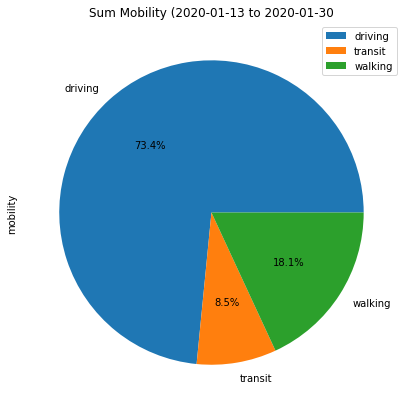

In [79]:
start_date = datetime.strptime('2020-01-13', '%Y-%m-%d')
end_date = datetime.strptime('2020-01-30', '%Y-%m-%d')

df = df_mobility_us[(df_mobility_us['date'] >= start_date) \
                    & (df_mobility_us['date'] < end_date)] \
                    .groupby('transportation_type').sum()
display(df)

print('normal, 2020-01-13 to 2020-01-30')
plot = df.plot.pie(y='mobility', 
                   title=f"Sum Mobility ({start_date.date()} to {end_date.date()}",
                   autopct='%1.1f%%',
                   figsize=(7, 7))

#### '2020-02-01' to '2020-03-10'

,mobility
transportation_type,
driving,10307840.60
transit,1086746.56
walking,2471884.05


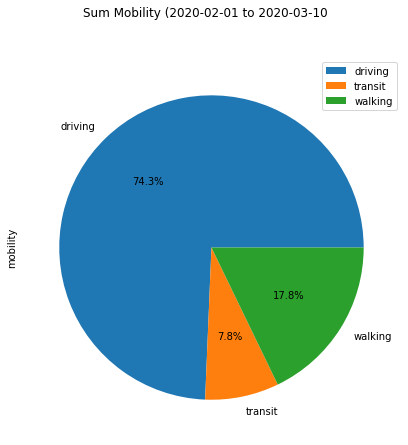

In [89]:
start_date = datetime.strptime('2020-02-01', '%Y-%m-%d')
end_date = datetime.strptime('2020-03-10', '%Y-%m-%d')

df = df_mobility_us[(df_mobility_us['date'] >= start_date) \
                    & (df_mobility_us['date'] < end_date)] \
                    .groupby('transportation_type').sum()
display(df)
print('')
plot = df.plot.pie(y='mobility', 
                   title=f"Sum Mobility ({start_date.date()} to {end_date.date()}",
                   autopct='%1.1f%%',
                   subplots=True,
                   figsize=(7, 7))

#### 1st wave, WHO declares pandemic 2020-03-11 to 2020-06-01

,mobility
transportation_type,
driving,17881634.65
transit,991988.40
walking,3802618.76


1st wave, WHO declares pandemic 2020-03-11 to 2020-06-01


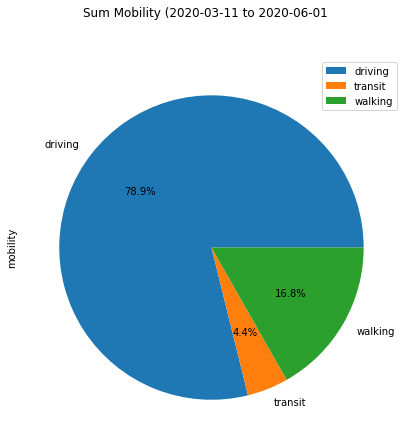

In [91]:
start_date = datetime.strptime('2020-03-11', '%Y-%m-%d')
end_date = datetime.strptime('2020-06-01', '%Y-%m-%d')

df = df_mobility_us[(df_mobility_us['date'] >= start_date) \
                    & (df_mobility_us['date'] < end_date)] \
                    .groupby('transportation_type').sum()
display(df)
print('1st wave, WHO declares pandemic 2020-03-11 to 2020-06-01')
plot = df.plot.pie(y='mobility', 
                   title=f"Sum Mobility ({start_date.date()} to {end_date.date()}",
                   autopct='%1.1f%%',
                   subplots=True,
                   figsize=(7, 7))

#### 3rd wave, '2020-11-01' to '2021-02-19'

,mobility
transportation_type,
driving,30033717.20
transit,1619807.79
walking,7745402.44


3rd wave, '2020-11-01' to '2021-02-19'


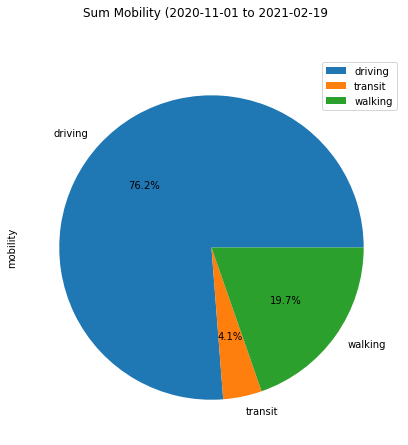

In [86]:
start_date = datetime.strptime('2020-11-01', '%Y-%m-%d')
end_date = datetime.strptime('2021-02-19', '%Y-%m-%d')

df = df_mobility_us[(df_mobility_us['date'] >= start_date) \
                    & (df_mobility_us['date'] < end_date)] \
                    .groupby('transportation_type').sum()
display(df)

print("3rd wave, '2020-11-01' to '2021-02-19'")
plot = df.plot.pie(y='mobility', 
                   title=f"Sum Mobility ({start_date.date()} to {end_date.date()}",
                   autopct='%1.1f%%',
                   subplots=True,
                   figsize=(7, 7))

#### 5th wave, '2021-07-13' to '2021-10-13'


,mobility
transportation_type,
driving,40177218.29
transit,2592404.67
walking,10770169.46


5th wave, '2021-07-13' to '2021-10-13'


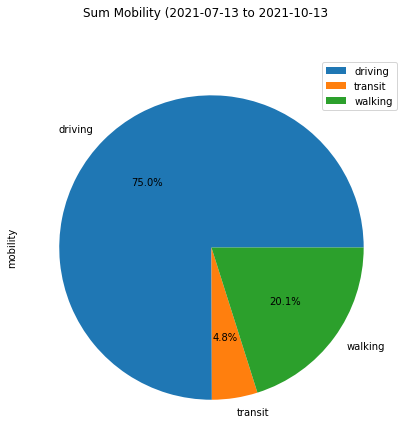

In [83]:
start_date = datetime.strptime('2021-07-13', '%Y-%m-%d')
end_date = datetime.strptime('2021-10-13', '%Y-%m-%d')

df = df_mobility_us[(df_mobility_us['date'] >= start_date) \
                    & (df_mobility_us['date'] < end_date)] \
                    .groupby('transportation_type').sum()
display(df)
print("5th wave, '2021-07-13' to '2021-10-13'")
plot = df.plot.pie(y='mobility', 
                   title=f"Sum Mobility ({start_date.date()} to {end_date.date()}",
                   autopct='%1.1f%%',
                   subplots=True,
                   figsize=(7, 7))

#### New Normal, 2021 Nov to Dec


,mobility
transportation_type,
driving,11483117.57
transit,843990.04
walking,3037529.53


New Normal, 2021 Nov to Dec


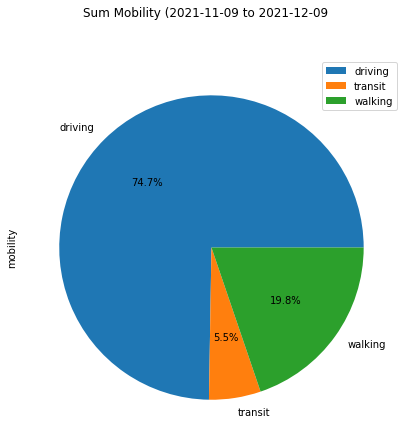

In [84]:
start_date = datetime.strptime('2021-11-09', '%Y-%m-%d')
end_date = datetime.strptime('2021-12-09', '%Y-%m-%d')

df = df_mobility_us[(df_mobility_us['date'] >= start_date) \
                    & (df_mobility_us['date'] < end_date)] \
                    .groupby('transportation_type').sum()
display(df)

print("New Normal, 2021 Nov to Dec")
plot = df.plot.pie(y='mobility', 
                   title=f"Sum Mobility ({start_date.date()} to {end_date.date()}",
                   autopct='%1.1f%%',
                   subplots=True,
                   figsize=(7, 7))

### [x, wrong] Plotly

In [67]:
start_date = datetime.strptime('2020-01-13', '%Y-%m-%d')
end_date = datetime.strptime('2020-03-13', '%Y-%m-%d')

df = df_mobility_us[(df_mobility_us['date'] >= start_date) & (df_mobility_us['date'] < end_date)]
display(df)
fig = px.pie(df,
             names='transportation_type',
             title=f"Covid-19 Mobility Trends ('{start_date.date()}' to '{end_date.date()}')",
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [68]:

start_date = datetime.strptime('2020-04-01', '%Y-%m-%d')
end_date = datetime.strptime('2020-06-01', '%Y-%m-%d')
df = df_mobility_us[(df_mobility_us['date'] >= start_date) & (df_mobility_us['date'] < end_date)]
display(df)
fig = px.pie(df,
             names='transportation_type',
             title=f"Covid-19 Mobility Trends ('{start_date.date()}' to '{end_date.date()}')",
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [69]:

start_date = datetime.strptime('2021-09-01', '%Y-%m-%d')
end_date = datetime.strptime('2021-11-01', '%Y-%m-%d')

df = df_mobility_us[(df_mobility_us['date'] >= start_date) & (df_mobility_us['date'] < end_date)]
display(df)
fig = px.pie(df,
             names='transportation_type',
             title=f"Covid-19 Mobility Trends ('{start_date.date()}' to '{end_date.date()}')",
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [70]:
# United States
# Brazil
#[13:]
mobility_apple = df_list[APPLE_FILENAME]\
                    .query('region == "United States"').T[13:]\
                    .rename(columns={146: 'driving', 147:'transit', 148: 'walking'})

# Set 'date' as the index of the dataframe
mobility_apple.index.name = 'date'

display(mobility_apple.head(5))
display(mobility_apple.tail(5))

,driving,transit,walking
date,,,
2020-01-20,102.57,92.39,94.79
2020-01-21,103.07,100.27,94.84
2020-01-22,103.01,101.06,97.04
2020-01-23,107.9,103.29,100.83
2020-01-24,124.7,113.06,126.67


,driving,transit,walking
date,,,
2021-12-06,142.77,103.92,143.51
2021-12-07,146.66,104.57,146.44
2021-12-08,150.17,106.52,150.56
2021-12-09,157.77,110.11,160.56
2021-12-10,183.93,128.3,202.3


# Build Graph from DataFrame

From DataFrame to Network Graph

https://towardsdatascience.com/from-dataframe-to-network-graph-bbb35c8ab675


In [71]:
# # Build undirected graph
# G = nx.from_pandas_edgelist(df_list['sf12010countydistance50miles'], 
#                             source='county1', target='county2', edge_attr=['mi_to_county'])
# G

In [72]:
# print(f"{G.number_of_nodes()} Nodes in G: {G.nodes}")
# print(f"{G.number_of_edges()} Edges in G: {G.edges}")

In [73]:
# # node connections information
# for n, nbrs in G.adj.items():
#     print(n, nbrs)
#     break